## Credit data regression 

#### Based on the data sourced on Kaggle, we will predict the credit balance for selected ethinicity groups of credit card holder using regression analysis given other the information about them such income, credit limit, credit rating, number of card held, age and education level

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Credit data

In [2]:
Credit_data=pd.read_excel('Credit_data.xlsx', index_col=0)
# Review a sample of the data 
Credit_data.sample(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
257,25.936,1774,135,2,71,14,Female,No,No,Asian,0
386,26.400,5640,398,3,58,15,Female,No,No,Asian,905
12,15.045,1311,138,3,64,16,Male,No,No,Caucasian,0
79,110.968,6662,468,3,45,11,Female,No,Yes,Caucasian,391
199,27.349,2000,169,4,51,16,Female,No,Yes,African American,0


In [3]:
# Exploring the data format
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [4]:
# use the function .describe() to explore unique value for each column
Credit_data.describe(include = "all")

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


In [5]:
# drop all rows where the balance is null as this will distort the analysis 
Credit_data = Credit_data[Credit_data['Balance'] != 0]

In [6]:
# Insert another column for Balance_Utilisation 
Credit_data['Limit_Utilisation'] = Credit_data['Balance']/Credit_data['Limit']
Credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Limit_Utilisation
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0.092346
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0.135892
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0.081979
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0.101431
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0.067592


In [7]:
Credit_data.describe(include = "all")

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Limit_Utilisation
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310,310,310,310,310.000000,310.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,165,271,192,158,NaN,NaN
mean,49.978810,5485.467742,405.051613,2.996774,55.606452,13.425806,NaN,NaN,NaN,NaN,670.987097,0.115588
std,37.881628,2052.451743,137.967389,1.426740,17.341794,3.208904,NaN,NaN,NaN,NaN,413.904019,0.053675
min,10.354000,1160.000000,126.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,5.000000,0.002286
25%,23.150250,3976.250000,304.000000,2.000000,42.000000,11.000000,NaN,NaN,NaN,NaN,338.000000,0.079930
50%,37.141000,5147.000000,380.000000,3.000000,55.500000,14.000000,NaN,NaN,NaN,NaN,637.500000,0.121081
75%,63.740250,6453.250000,469.000000,4.000000,69.000000,16.000000,NaN,NaN,NaN,NaN,960.750000,0.151530


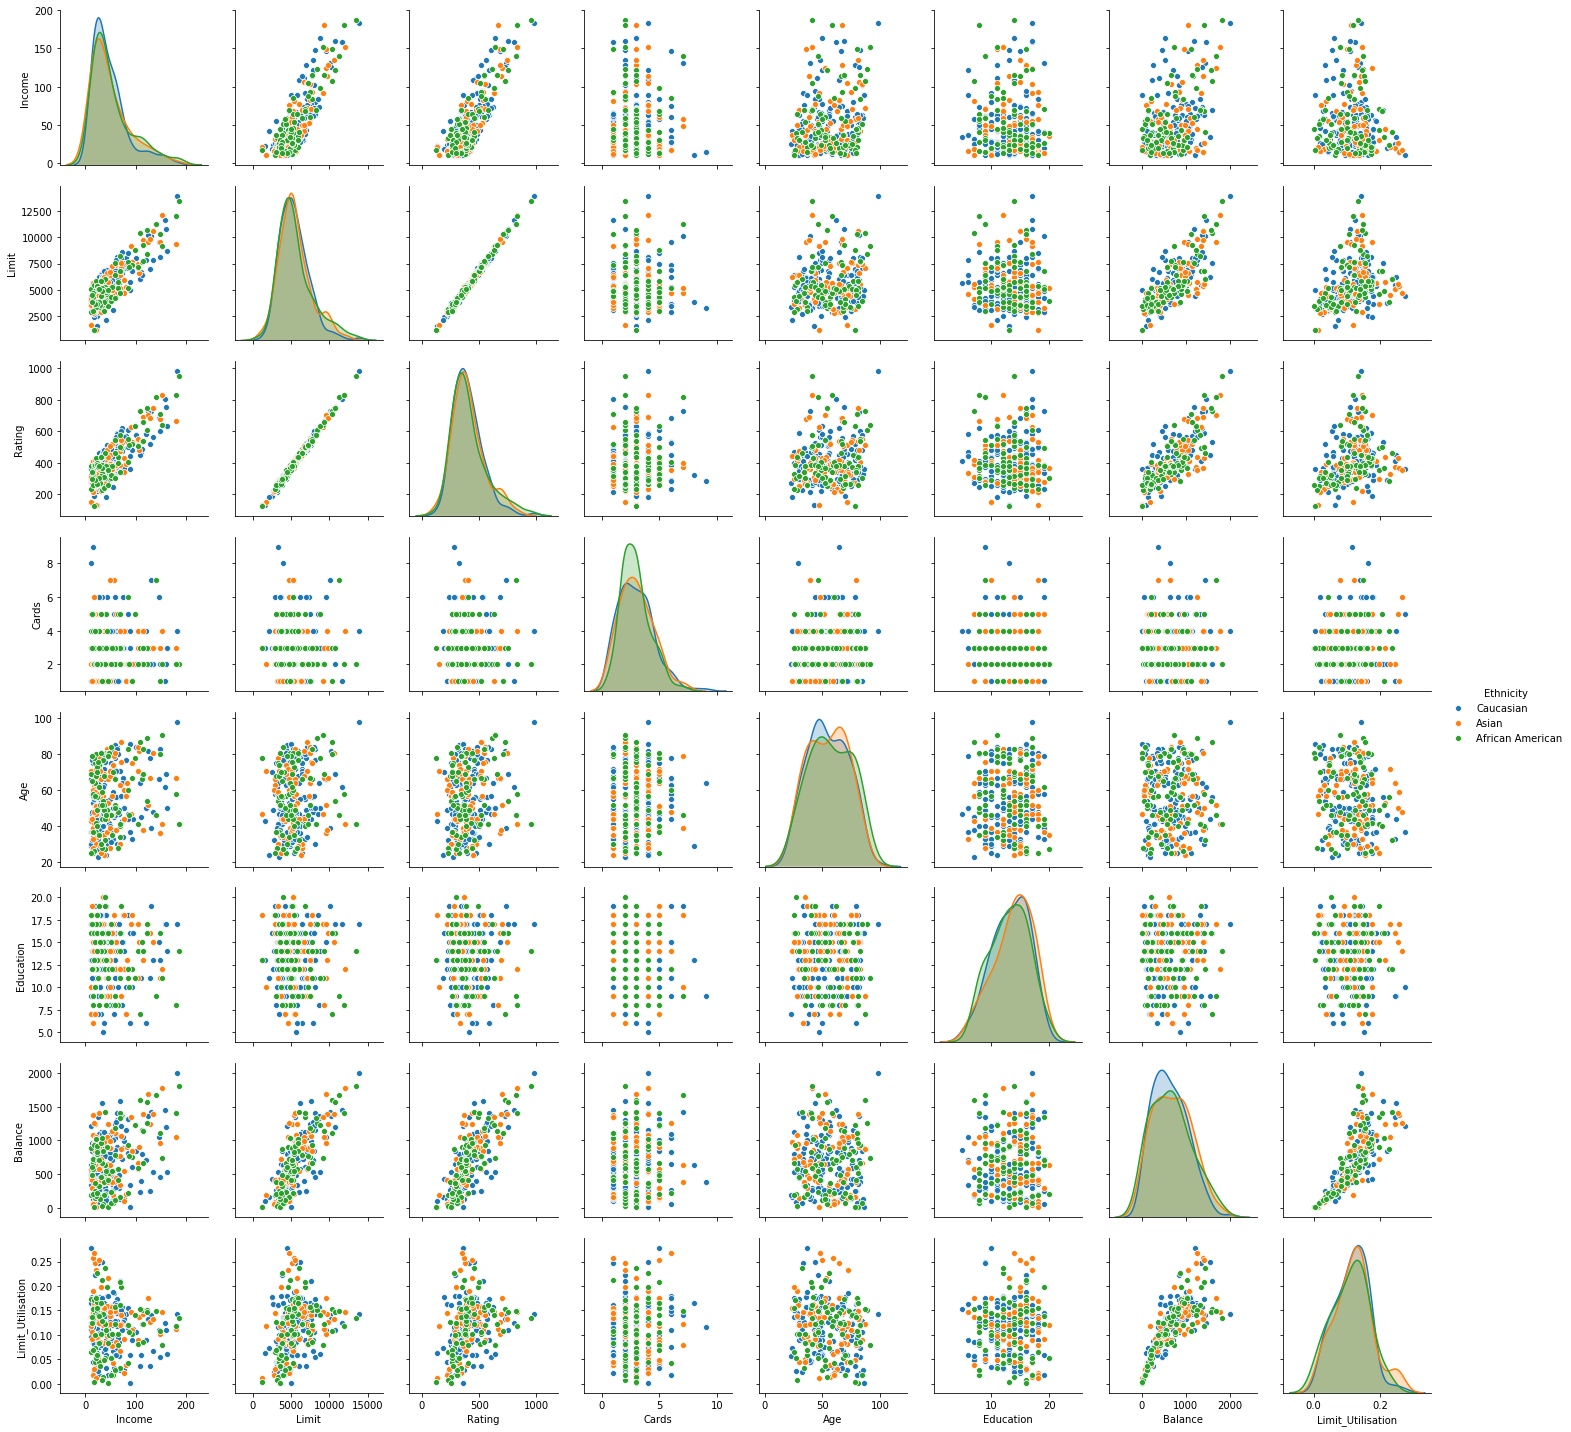

In [8]:
# visualise the correlation between any two continuous variable using the seanborn pairplot
sns.pairplot(Credit_data, hue='Ethnicity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E630198>]],
      dtype=object)

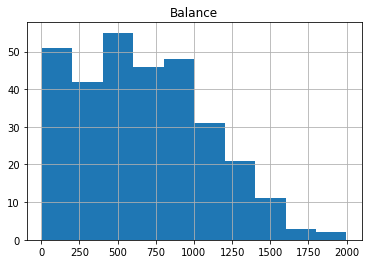

In [9]:
#Visualise the distribution of the credit balance through the histogram
Credit_data.hist(column='Balance')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF8E8D0>]],
      dtype=object)

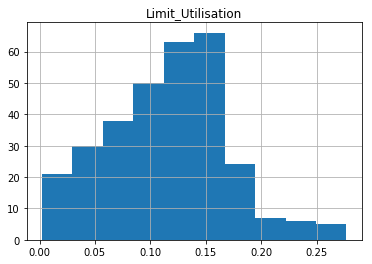

In [10]:
#Visualise the distribution of the credit balance through the histogram
Credit_data.hist(column='Limit_Utilisation')

In [11]:
Credit_data = pd.get_dummies(Credit_data)
Credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Limit_Utilisation,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0.092346,1,0,1,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,903,0.135892,0,1,0,1,0,1,0,1,0
3,104.593,7075,514,4,71,11,580,0.081979,1,0,1,0,1,0,0,1,0
4,148.924,9504,681,3,36,11,964,0.101431,0,1,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0.067592,1,0,1,0,0,1,0,0,1


In [12]:
Credit_data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Limit_Utilisation', 'Gender_ Male', 'Gender_Female', 'Student_No',
       'Student_Yes', 'Married_No', 'Married_Yes',
       'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

In [13]:
# Formulating the correlation matrix to determine the strength of the relation between a pair of variables
Credit_data.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,Limit_Utilisation,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
Income,1.000000,0.833706,0.830651,-0.040318,0.227115,-0.032540,0.414373,-0.084166,0.021187,-0.021187,0.018829,-0.018829,-0.035209,0.035209,0.050538,-0.000537,-0.043412
Limit,0.833706,1.000000,0.996091,-0.022540,0.164160,-0.031583,0.795757,0.336322,0.037479,-0.037479,0.128538,-0.128538,-0.027618,0.027618,0.032118,0.007660,-0.034412
Rating,0.830651,0.996091,1.000000,0.024991,0.167269,-0.040466,0.798441,0.342596,0.035413,-0.035413,0.122168,-0.122168,-0.034104,0.034104,0.030544,0.005503,-0.031207
Cards,-0.040318,-0.022540,0.024991,1.000000,0.020615,-0.087351,0.074416,0.110985,0.011200,-0.011200,0.026456,-0.026456,0.001775,-0.001775,-0.019562,0.017205,0.002309
Age,0.227115,0.164160,0.167269,0.020615,1.000000,0.023899,0.008343,-0.126122,-0.010058,0.010058,0.023400,-0.023400,0.022040,-0.022040,0.058262,-0.020925,-0.032730
Education,-0.032540,-0.031583,-0.040466,-0.087351,0.023899,1.000000,0.001001,0.000950,0.010611,-0.010611,-0.077099,0.077099,-0.083458,0.083458,-0.037620,0.076741,-0.032785
Balance,0.414373,0.795757,0.798441,0.074416,0.008343,0.001001,1.000000,0.809723,0.017192,-0.017192,-0.209602,0.209602,0.031086,-0.031086,0.004174,0.047665,-0.044269
Limit_Utilisation,-0.084166,0.336322,0.342596,0.110985,-0.126122,0.000950,0.809723,1.000000,0.001754,-0.001754,-0.428016,0.428016,0.068904,-0.068904,-0.045883,0.057980,-0.009614
Gender_ Male,0.021187,0.037479,0.035413,0.011200,-0.010058,0.010611,0.017192,0.001754,1.000000,-1.000000,0.063201,-0.063201,0.010738,-0.010738,0.052385,-0.039627,-0.011681
Gender_Female,-0.021187,-0.037479,-0.035413,-0.011200,0.010058,-0.010611,-0.017192,-0.001754,-1.000000,1.000000,-0.063201,0.063201,-0.010738,0.010738,-0.052385,0.039627,0.011681


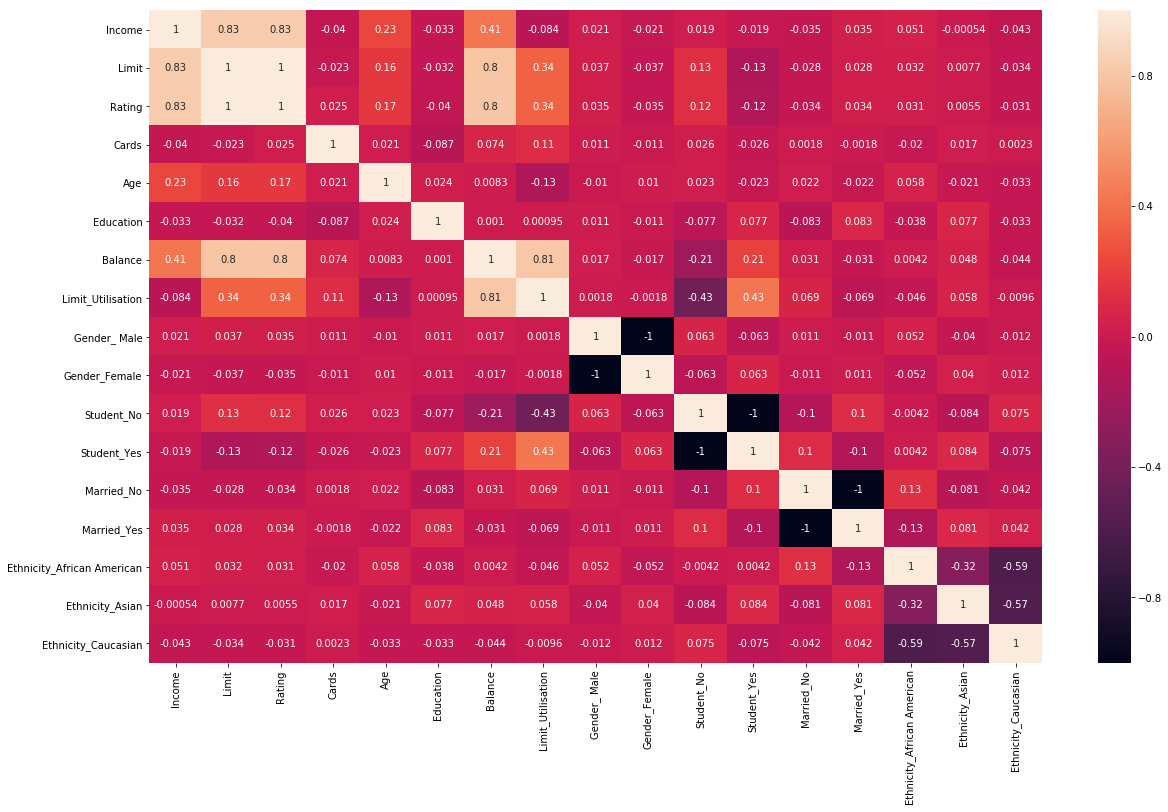

In [14]:
# Visualising the correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(Credit_data.corr(), annot=True)

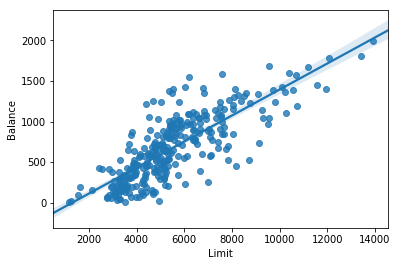

In [15]:
sns.regplot(x='Limit', y='Balance', data=Credit_data)

In [16]:
X = Credit_data[['Limit']]
y = Credit_data[['Balance']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [17]:
print(X_train.shape, y_train.shape)

(232, 1) (232, 1)


In [18]:
print(X_test.shape, y_test.shape)

(78, 1) (78, 1)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn import linear_model, preprocessing

In [20]:
model = linear_model.LinearRegression(normalize=True)

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
print(model.score(X_train, y_train))

0.6702257347650877


In [23]:
y_pred=model.predict(X_test)

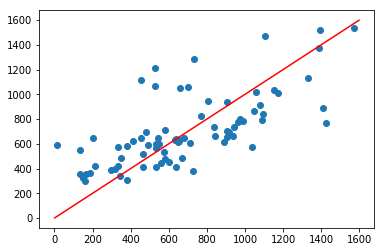

In [24]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range (1, 1600)], [y for y in range(1, 1600)], color='red')

In [25]:
X = Credit_data.drop(['Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
model2 = sm.OLS(y_train, X_train)
model2_results = model2.fit()
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.457e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        04:07:36   Log-Likelihood:                -861.58
No. Observations:                 232   AIC:                             1749.
Df Residuals:                     219   BIC:                             1794.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -159.8021      1.711    -93.421      0.000    -163.173    -156.431
Income                        -9.7640      0.089   -109.103      0.000      -9.940      -9.588
Limit                          0.3307      0.005     64.471      0.000       0.321       0.341
Rating                        -0.1340      0.069     -1.941      0.054      -0.270       0.002
Cards                         25.0428      0.622     40.285      0.000      23.818      26.268
Age                           -0.9857      0.041    -23.820      0.000      -1.067      -0.904
Education                      0.0900      0.213      0.422      0.673      -0.330       0.510
Limit_Utilisation            120.0051     41.641      2.882      0.004      37.936     202.074
Gender_ Male                 -80.1698      1.107    -72.394      0.000     -82.352     -77.987
Gender_Female                -79.6323      1.078    -73.842      0.000     -81.758     -77.507
Student_No                  -324.0114      2.228   -145.438      0.000    -328.402    -319.621
Student_Yes                  164.2093      2.692     60.989      0.000     158.903     169.516
Married_No                   -78.8615      1.064    -74.085      0.000     -80.959     -76.764
Married_Yes                  -80.9406      1.149    -70.420      0.000     -83.206     -78.675
Ethnicity_African American   -51.8123      1.243    -41.685      0.000     -54.262     -49.363
Ethnicity_Asian              -54.6754      1.279    -42.760      0.000     -57.195     -52.155
Ethnicity_Caucasian          -53.3144      1.050    -50.793      0.000     -55.383     -51.246
==============================================================================
Omnibus:                        4.999   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.962
Skew:                          -0.358   Prob(JB):                       0.0837
Kurtosis:                       2.975   Cond. No.                     1.83e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
y_pred = model2_results.predict(X_test)

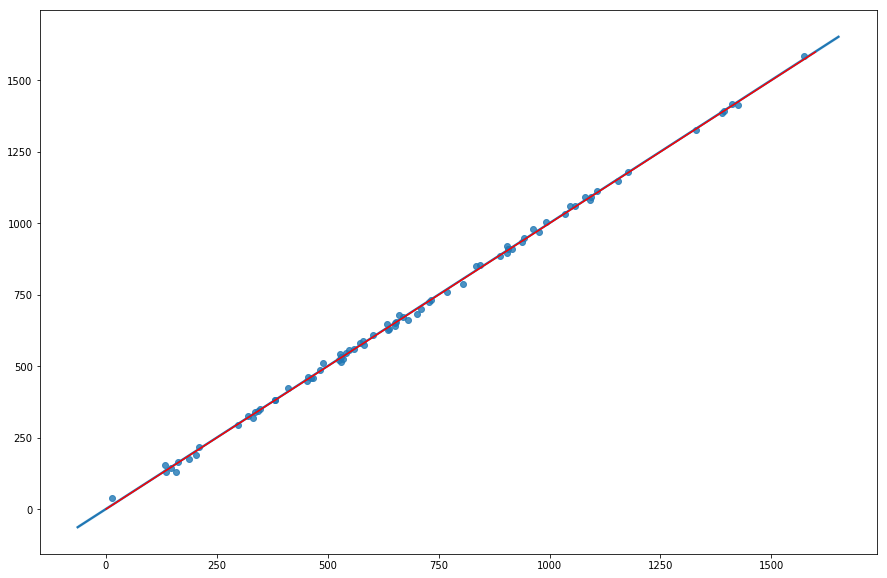

In [28]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1, 1600)], [y for y in range(1, 1600)], color='red')

In [29]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model2_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(5)

,actual,predicted
386,905,895.445698
265,651,653.206017
210,732,732.730875
264,133,153.399441
347,907,909.483320


In [30]:
rmse(matches['predicted'], matches['actual'])

10.56410248657786

## Model2  Conclusion
Based on the Regression Results, the 'Rating' and level of 'Education' are not statistically significant when predicting the balance on an individual's credit card.  As the P-value is very high, we will drop this variable first and consider the impact on the model accuracy

In [31]:
# droping the education variable based on the conclusion for Model2
X = Credit_data.drop(['Education', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [32]:
model3 = sm.OLS(y_train, X_train)
model3_results = model3.fit()
model3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.785e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        04:07:37   Log-Likelihood:                -861.68
No. Observations:                 232   AIC:                             1747.
Df Residuals:                     220   BIC:                             1789.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -159.3354      1.303   -122.264      0.000    -161.904    -156.767
Income                        -9.7687      0.089   -110.219      0.000      -9.943      -9.594
Limit                          0.3309      0.005     64.995      0.000       0.321       0.341
Rating                        -0.1360      0.069     -1.979      0.049      -0.272      -0.001
Cards                         25.0502      0.620     40.388      0.000      23.828      26.273
Age                           -0.9851      0.041    -23.865      0.000      -1.066      -0.904
Limit_Utilisation            117.7162     41.210      2.857      0.005      36.500     198.933
Gender_ Male                 -79.9332      0.953    -83.839      0.000     -81.812     -78.054
Gender_Female                -79.4023      0.929    -85.475      0.000     -81.233     -77.571
Student_No                  -323.9187      2.213   -146.382      0.000    -328.280    -319.558
Student_Yes                  164.5832      2.538     64.849      0.000     159.581     169.585
Married_No                   -78.6730      0.964    -81.569      0.000     -80.574     -76.772
Married_Yes                  -80.6625      0.940    -85.789      0.000     -82.516     -78.809
Ethnicity_African American   -51.7100      1.217    -42.495      0.000     -54.108     -49.312
Ethnicity_Asian              -54.4662      1.177    -46.292      0.000     -56.785     -52.147
Ethnicity_Caucasian          -53.1592      0.981    -54.168      0.000     -55.093     -51.225
==============================================================================
Omnibus:                        4.928   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.877
Skew:                          -0.355   Prob(JB):                       0.0873
Kurtosis:                       2.983   Cond. No.                     2.51e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
y_pred = model3_results.predict(X_test)

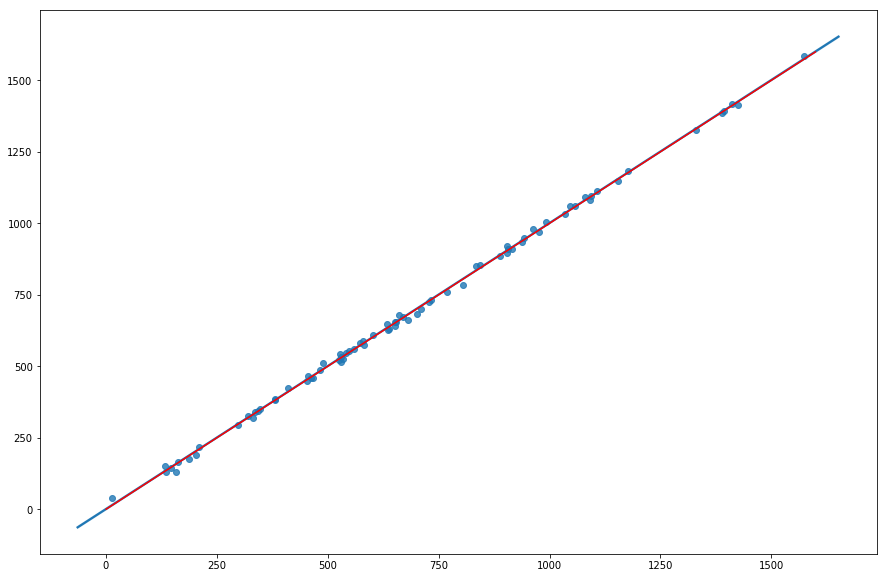

In [34]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1, 1600)], [y for y in range(1, 1600)], color='red')

In [35]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model3_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(5)

,actual,predicted
318,136,130.691583
347,907,909.097862
28,467,459.946223
264,133,153.206577
230,1058,1060.705007


In [36]:
rmse(matches['predicted'], matches['actual'])

10.556290829779881

## Model3  Conclusion
Based on the Regression Results, Model 3 improves the accuracy and all the remaining variables are statistically significant in predicting the balance on the individual's credit card. However the 'Rating' P-value is still too close to 0.05 and therefore may not be statistically significant when predicting the balance on an individual's credit card. Besides, the rating is almost perfectly correlated to the credit 'Limit' and therefore we can conclude that we will not be lossing anything signficant if we decide to drop this variable as it is already built-in the limit that an individual is granted. As such we will drop the 'Rating' in addition to the 'Education' variable and consider the impact on the model accuracy

In [37]:
# droping the 'Education' and 'Rating' variables based on the conclusion for Model3
X = Credit_data.drop(['Rating', 'Education', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [38]:
model4 = sm.OLS(y_train, X_train)
model4_results = model4.fit()
model4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.110e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        04:07:37   Log-Likelihood:                -863.72
No. Observations:                 232   AIC:                             1749.
Df Residuals:                     221   BIC:                             1787.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -160.3577      1.204   -133.152      0.000    -162.731    -157.984
Income                        -9.7537      0.089   -109.732      0.000      -9.929      -9.579
Limit                          0.3215      0.002    176.299      0.000       0.318       0.325
Cards                         24.3591      0.516     47.214      0.000      23.342      25.376
Age                           -0.9917      0.041    -23.949      0.000      -1.073      -0.910
Limit_Utilisation            124.6699     41.330      3.016      0.003      43.219     206.121
Gender_ Male                 -80.3669      0.934    -86.048      0.000     -82.208     -78.526
Gender_Female                -79.9908      0.886    -90.299      0.000     -81.737     -78.245
Student_No                  -323.9297      2.227   -145.432      0.000    -328.319    -319.540
Student_Yes                  163.5720      2.502     65.369      0.000     158.641     168.503
Married_No                   -79.1468      0.940    -84.159      0.000     -81.000     -77.293
Married_Yes                  -81.2109      0.904    -89.796      0.000     -82.993     -79.429
Ethnicity_African American   -52.0482      1.213    -42.919      0.000     -54.438     -49.658
Ethnicity_Asian              -54.6921      1.179    -46.399      0.000     -57.015     -52.369
Ethnicity_Caucasian          -53.6174      0.960    -55.855      0.000     -55.509     -51.726
==============================================================================
Omnibus:                        5.940   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.090
Skew:                          -0.391   Prob(JB):                       0.0476
Kurtosis:                       2.866   Cond. No.                     1.34e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
y_pred = model4_results.predict(X_test)

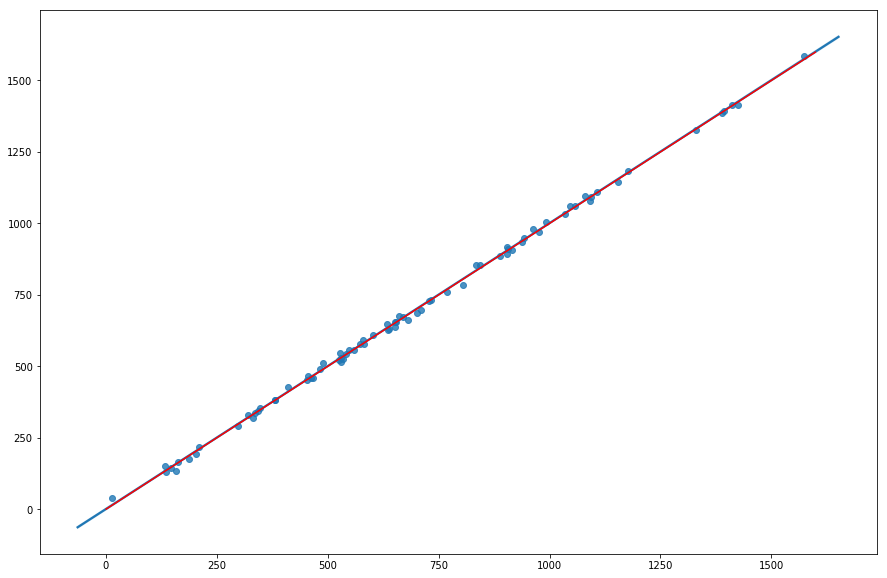

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1, 1600)], [y for y in range(1, 1600)], color='red')

In [41]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model4_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

,actual,predicted
68,889,885.387876
381,661,677.728555
135,835,854.757862
152,534,525.566149
265,651,654.933911
237,489,511.784084
40,344,343.271680
141,1425,1415.549469
114,768,760.022160
264,133,153.193021


In [42]:
rmse(matches['predicted'], matches['actual'])

10.665785308005127

## Model4  Conclusion
Based on the Regression Results, Model 4 does not improves the accuracy on the previous two models, although all the remaining variables are statistically significant in predicting the balance on the individual's credit card. Model 3 still provides the best results in terms of accuracy. We also want to assess impact of droping a further variable, 'Limit_Utilisation' as this is already included in the 'Balance' and 'Limit'.

In [43]:
# droping the 'Education', 'Rating' and 'Limit_Utilisation' variables based on the conclusion for Model4
X = Credit_data.drop(['Rating', 'Education', 'Limit_Utilisation', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [44]:
model5 = sm.OLS(y_train, X_train)
model5_results = model5.fit()
model5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.405e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        04:07:38   Log-Likelihood:                -868.40
No. Observations:                 232   AIC:                             1757.
Df Residuals:                     222   BIC:                             1791.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -159.5003      1.191   -133.870      0.000    -161.848    -157.152
Income                       -10.0016      0.034   -290.316      0.000     -10.070      -9.934
Limit                          0.3267      0.001    534.548      0.000       0.325       0.328
Cards                         24.8358      0.500     49.671      0.000      23.850      25.821
Age                           -1.0119      0.042    -24.319      0.000      -1.094      -0.930
Gender_ Male                 -79.8745      0.936    -85.316      0.000     -81.719     -78.029
Gender_Female                -79.6258      0.893    -89.126      0.000     -81.386     -77.865
Student_No                  -329.7285      1.145   -287.898      0.000    -331.986    -327.471
Student_Yes                  170.2282      1.201    141.706      0.000     167.861     172.596
Married_No                   -78.6895      0.945    -83.276      0.000     -80.552     -76.827
Married_Yes                  -80.8108      0.911    -88.727      0.000     -82.606     -79.016
Ethnicity_African American   -52.0541      1.235    -42.162      0.000     -54.487     -49.621
Ethnicity_Asian              -54.3173      1.193    -45.517      0.000     -56.669     -51.966
Ethnicity_Caucasian          -53.1289      0.963    -55.154      0.000     -55.027     -51.231
==============================================================================
Omnibus:                        6.164   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.214
Skew:                          -0.401   Prob(JB):                       0.0447
Kurtosis:                       2.967   Cond. No.                     3.78e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
y_pred = model5_results.predict(X_test)

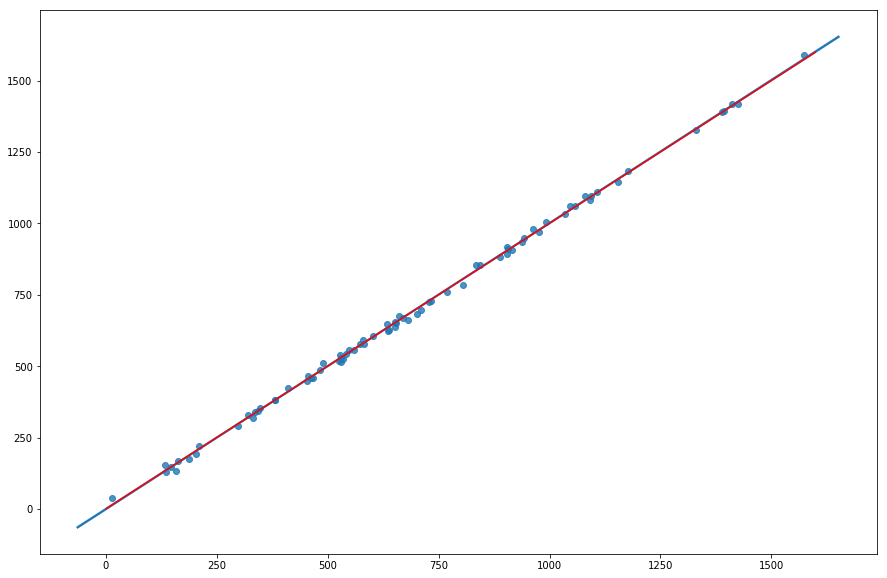

In [46]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1,1600)], [y for y in range(1, 1600)], color='red')

In [47]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model5_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

,actual,predicted
371,992,1005.941367
135,835,854.327906
89,579,591.063865
220,653,638.063144
66,602,607.166215
152,534,524.399735
386,905,892.363085
123,904,918.064370
237,489,511.444436
362,382,381.641790


In [48]:
rmse(matches['predicted'], matches['actual'])

10.944983172252634

## Model5  Conclusion
Based on the Regression Results, Model 5 does not improves the accuracy on the previous three models (i.e. Model2 to Model4), although all the remaining variables are statistically significant in predicting the balance on the individual's credit card.Model 3 is stilling providing the best results in terms of accuracy.  Based on the correlation matrix, we noted that the correlation between the credit balance and 'Age' as well as 'Ethnicity_African American' were very weak as such we will also drop these variable and consider impact on model results.

In [49]:
# droping the 'Education', 'Rating', 'Limit_Utilisation' and 'Ethnicity_African American' variables based on above
X = Credit_data.drop(['Rating','Education','Limit_Utilisation', 'Age', 'Ethnicity_African American', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [50]:
model6 = sm.OLS(y_train, X_train)
model6_results = model6.fit()
model6_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.357e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):          4.50e-295
Time:                        04:07:39   Log-Likelihood:                -1019.0
No. Observations:                 232   AIC:                             2056.
Df Residuals:                     223   BIC:                             2087.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -202.3305      2.177    -92.920      0.000    -206.622    -198.039
Income                -10.0998      0.065   -154.565      0.000     -10.229      -9.971
Limit                   0.3270      0.001    280.221      0.000       0.325       0.329
Cards                  24.0076      0.953     25.199      0.000      22.130      25.885
Gender_ Male         -101.0234      1.746    -57.854      0.000    -104.465     -97.582
Gender_Female        -101.3071      1.685    -60.113      0.000    -104.628     -97.986
Student_No           -351.5938      2.106   -166.983      0.000    -355.743    -347.444
Student_Yes           149.2634      2.322     64.269      0.000     144.687     153.840
Married_No           -100.8836      1.712    -58.935      0.000    -104.257     -97.510
Married_Yes          -101.4469      1.768    -57.372      0.000    -104.931     -97.962
Ethnicity_Asian         0.9090      3.917      0.232      0.817      -6.810       8.628
Ethnicity_Caucasian     3.5550      3.336      1.066      0.288      -3.019      10.129
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                1.034
Skew:                           0.015   Prob(JB):                        0.596
Kurtosis:                       2.674   Cond. No.                     4.88e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.31e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
y_pred = model6_results.predict(X_test)

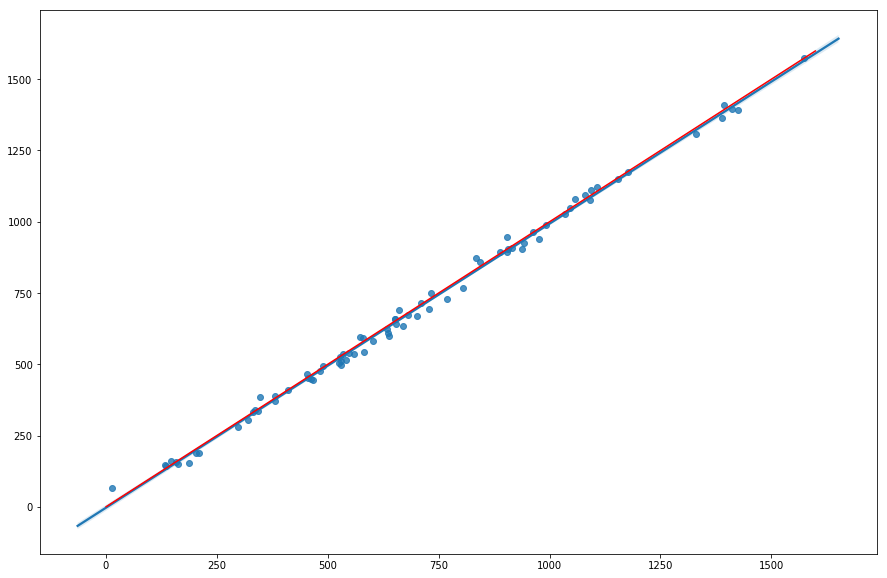

In [52]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1, 1600)], [y for y in range(1, 1600)], color='red')

In [53]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model6_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

,actual,predicted
141,1425,1390.570015
260,1092,1077.585462
114,768,728.997256
152,534,536.368115
30,915,907.404147
224,573,595.090860
67,1388,1363.720860
42,1155,1148.960547
94,937,902.938686
359,347,384.880771


In [54]:
rmse(matches['predicted'], matches['actual'])

21.067913776526595

## Model6  Conclusion
Based on the Regression Results, Model 6 does not improves the accuracy on the previous four models (i.e. Model2 to Model5)and the remaining Ethnicity variables no longer statistically significant in predicting the balance on the individual's credit card. Model 3 is stilling providing the best outcome in terms of accuracy. However, we also want to assess how, only keeping four variable including 'Income', 'Limit', 'Rating', and 'Limit_Utilisation', impacts on the model accuracy. 

In [55]:
# keeping only four variable including 'Income', 'Limit', 'Rating', and 'Limit_Utilisation' based on Model6 Conclusion
X = Credit_data.drop([ 'Education', 'Age', 'Cards','Gender_ Male', 'Gender_Female', 'Student_No','Student_Yes', 
                      'Married_No', 'Married_Yes','Ethnicity_African American', 'Ethnicity_Asian', 
                      'Ethnicity_Caucasian', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [56]:
model7 = sm.OLS(y_train, X_train)
model7_results = model7.fit()
model7_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1926.
Date:                Tue, 23 Jul 2019   Prob (F-statistic):          7.70e-174
Time:                        04:07:39   Log-Likelihood:                -1324.8
No. Observations:                 232   AIC:                             2660.
Df Residuals:                     227   BIC:                             2677.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -572.5208     21.420    -26.728      0.000    -614.729    -530.312
Income               -1.5357      0.319     -4.807      0.000      -2.165      -0.906
Limit                 0.0835      0.027      3.040      0.003       0.029       0.138
Rating                0.9691      0.406      2.385      0.018       0.168       1.770
Limit_Utilisation  4121.7273    126.329     32.627      0.000    3872.800    4370.655
==============================================================================
Omnibus:                       88.229   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.459
Skew:                           1.575   Prob(JB):                     2.33e-68
Kurtosis:                       7.722   Cond. No.                     1.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
y_pred = model7_results.predict(X_test)

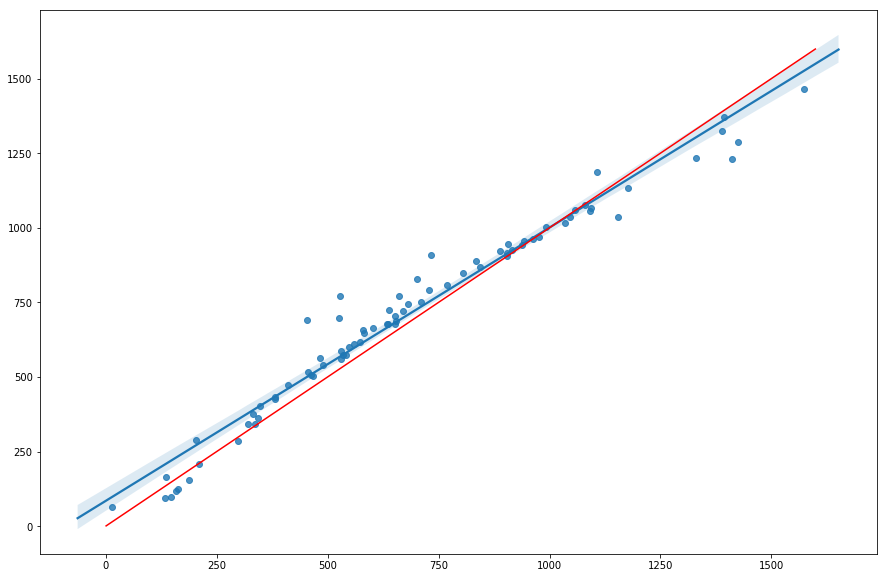

In [58]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1,1600)], [y for y in range(1,1600)], color='red')

In [59]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model7_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

,actual,predicted
38,1093,1065.452465
318,136,164.290048
90,1176,1134.832681
66,602,663.016110
24,411,474.438492
268,942,954.323587
44,976,967.454872
224,573,615.798010
265,651,704.618787
40,344,361.055903


In [60]:
rmse(matches['predicted'], matches['actual'])

73.59159984514062

## Model7 Conclusion
Based on the Regression Results, Model7 does not improves the accuracy on the previous three models (i.e. Model2 to Model6), although all the remaining variables are statistically significant in predicting the balance on the individual's credit card. Overall, Model3 is stilling providing the best outcome. We will now consider if we could improve on Model3 by furthe eliminating outliers, particularly accounts with very low balance assuming these relate to individual who recent go approved for a credit card and are still building up their balance. As such will will disregard cases with 'Limit_Utilisation' below 5%.

In [61]:
Credit_data2 =Credit_data[Credit_data['Limit_Utilisation'] > 0.05]
Credit_data2.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Limit_Utilisation,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0.092346,1,0,1,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,903,0.135892,0,1,0,1,0,1,0,1,0
3,104.593,7075,514,4,71,11,580,0.081979,1,0,1,0,1,0,0,1,0
4,148.924,9504,681,3,36,11,964,0.101431,0,1,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0.067592,1,0,1,0,0,1,0,0,1


In [62]:
# use the function .describe() to explore unique value for each column
Credit_data2.describe(include = "all")

,Income,Limit,Rating,Cards,Age,Education,Balance,Limit_Utilisation,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,51.022977,5775.139098,424.447368,3.000000,54.830827,13.379699,762.710526,0.129666,0.481203,0.518797,0.860902,0.139098,0.375940,0.624060,0.244361,0.236842,0.518797
std,39.364301,2034.067569,136.763779,1.448487,17.303875,3.213562,373.726298,0.043911,0.500588,0.500588,0.346701,0.346701,0.485278,0.485278,0.430518,0.425946,0.500588
min,10.354000,1551.000000,134.000000,1.000000,23.000000,5.000000,98.000000,0.051758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.980750,4435.250000,338.250000,2.000000,41.250000,11.000000,463.500000,0.099448,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.004500,5331.000000,391.000000,3.000000,53.000000,14.000000,719.000000,0.127473,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.003000,6776.500000,490.500000,4.000000,68.000000,16.000000,1014.250000,0.156295,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,0.276930,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
X = Credit_data2.drop(['Education', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data2[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [64]:
model8 = sm.OLS(y_train, X_train)
model8_results = model8.fit()
model8_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.673e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):          1.97e-292
Time:                        04:07:40   Log-Likelihood:                -726.76
No. Observations:                 199   AIC:                             1478.
Df Residuals:                     187   BIC:                             1517.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -161.9820      1.679    -96.466      0.000    -165.295    -158.669
Income                        -9.6251      0.110    -87.690      0.000      -9.842      -9.409
Limit                          0.3306      0.005     65.297      0.000       0.321       0.341
Rating                        -0.1739      0.066     -2.635      0.009      -0.304      -0.044
Cards                         24.7920      0.642     38.596      0.000      23.525      26.059
Age                           -0.9725      0.042    -23.229      0.000      -1.055      -0.890
Limit_Utilisation            223.1915     59.530      3.749      0.000     105.756     340.627
Gender_ Male                 -82.0537      1.069    -76.759      0.000     -84.163     -79.945
Gender_Female                -79.9283      1.103    -72.489      0.000     -82.103     -77.753
Student_No                  -321.4169      2.607   -123.286      0.000    -326.560    -316.274
Student_Yes                  159.4349      3.519     45.301      0.000     152.492     166.378
Married_No                   -80.1935      1.102    -72.773      0.000     -82.367     -78.020
Married_Yes                  -81.7885      1.102    -74.200      0.000     -83.963     -79.614
Ethnicity_African American   -52.8296      1.248    -42.325      0.000     -55.292     -50.367
Ethnicity_Asian              -56.1789      1.269    -44.260      0.000     -58.683     -53.675
Ethnicity_Caucasian          -52.9735      1.017    -52.104      0.000     -54.979     -50.968
==============================================================================
Omnibus:                        5.098   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.740
Skew:                          -0.364   Prob(JB):                       0.0935
Kurtosis:                       3.207   Cond. No.                     1.06e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
y_pred = model8_results.predict(X_test)

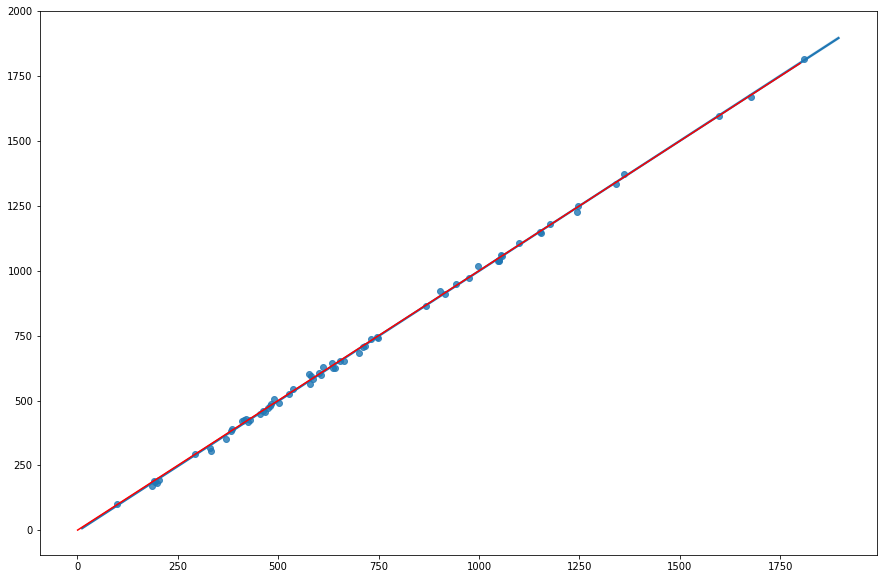

In [66]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (1,1800)], [y for y in range(1,1800)], color='red')

In [67]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model8_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

,actual,predicted
379,717,708.709606
364,578,600.728492
28,467,456.910196
327,1361,1373.476724
350,503,491.821527
236,191,191.743053
5,331,317.545822
384,382,382.648125
122,454,448.703094
90,1176,1180.753153


In [68]:
rmse(matches['predicted'], matches['actual'])

10.723070349234563

## Model8 Conclusion
Based on the Regression Results, Model8 does not improves the accuracy on the previous three models (i.e. Model2 to Model7), as such outlier have no further impact on the model accuracy.

# Overall conclusion 
Based on the Regression Results, Model3 provides the best outcome when predicting the credit card balance. All the variable, except 'Education' are statistically significant in predicting the balance on the individual's credit card.